**ASSIGNMENT 1 - EMPIRICAL STUDY OF KNAPSACK PROBLEM**

**1. Group Description**

Group Number: 1 \\
Member Names: Tanner Giddings and Tamara Micic \\
Member Student Numbers: 300172545 and 300163312 \\

**2. Knapsack Problem**

Given a set of objects and a 'bag', we want to be able to maximize the value of the objects that are put into the bag while being constrained by the size of the bag. We will attempt to do this with 4 different algorithms and compare results.

**3. Dataset**

https://www.kaggle.com/datasets/warcoder/knapsack-problem?resource=download \\
Dataset containing multiple different combinations of 'bags', objects and values to enable the simulation of multiple different knapsack problems.

**Import important libraries**

In [ ]:
import pandas as pd
import itertools
import numpy as np

**Read Dataset**

As outlined in the project description, it should be possible for the correctors to execute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, you can upload it to a public GitHub repository and provide a link to the raw version of the dataset.

The link to the raw version is as follows:
*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.csv*

For example:

https://raw.githubusercontent.com/baharin/KnapsackProblem/main/knapsack_5_items.csv

Now provide the link to YOUR dataset and read the dataset using pandas:

In [ ]:
#url = "https://raw.githubusercontent.com/TannerGiddings21/CSI4106_A1/main/knapsack_5_items.csv?token=GHSAT0AAAAAACHXTHO7YBX5GNQVDSHM6DOIZIIPPKQ"
url = "https://raw.githubusercontent.com/tamaraamicic/KnapsackProblem/main/knapsack_5_items.csv"

dataset = pd.read_csv(url)

Let's see what are the columns of the dataset? :

In [ ]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

As we expected, we have columns for weights, costs, capacity, best picks and best price for all the instances.

Now let's see the first 10 entries (rows):

In [ ]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Preprocessing Step**

Typically, the initial step in any project that involves reading and handling data is data preprocessing and cleansing.

In our dataset, we expect the entries in the "Weights," "Prices," and "Best Picks" columns to be in the form of arrays of floats or integers, like this: [45, 40, 42, 38, 10]

However, when you read each entry using pandas, they will be in a form of a string: "[45 40 42 38 10]"

So we need to convert these strings into "arrays of floats or integers." You can utilize the function provided below for this purpose:


In [ ]:
def string_to_list(string):
    string_list = string.strip('[]').split()
    float_list = [float(element) for element in string_list]
    return float_list

Furthermore, it's possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use dropna() function to do so:

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))

Now it's time to implement the search algorithms. For each algorithm, a template is provided to you. You can modify this template if you want. But first you should try to go look at all the parameters used, as they are all important. You can also define any number of auxiliary functions you want.


**4. Generate and Test**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.

In [ ]:
from itertools import product

def gen_and_test(data):

    all_solutions = list(product([0, 1], repeat=5)) # generates all 32 combinations ([[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], ..., [1, 1, 1, 1, 1]])

    best_solution_price = -1
    best_solution = [0, 0, 0, 0, 0]

    for solution in all_solutions: # iterate through all 32 possible solutions to find the best
        current_solution_weight = 0
        current_solution_price = 0
        for i in range(len(solution)): # len(solution) = 5
            current_solution_weight = current_solution_weight + data.Weights[i]*solution[i]
            current_solution_price = current_solution_price + data.Prices[i]*solution[i]
        if current_solution_weight <= data.Capacity and current_solution_price > best_solution_price: # new best solution
            best_solution_price = current_solution_price
            best_solution = solution

    return best_solution_price, best_solution

In [ ]:
solutions = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = gen_and_test(row)
    solutions.append(1 if target == solution else 0)

In [ ]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

Accuracy of best prices found is 1.0


**Your Analysis:**

The accuracy found is 100%, meaning that the optimal solutions we found match what is provided as "best pick" by the Kaggle authors. The dataset is trustable.

------------------------------------------------------------------------------------------------

**5. Greedy Search**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.

In [ ]:
def find_max(D):
    """
    Finds the maximum weight in a list and returns the index
    @param D: Dictionary containing indices and price per weight
    @return max_index: Maximum index
    """
    max_index = -1
    for key in D.keys():
        cur_val = D[key]
        if max_index == -1 or cur_val > max_val: # tamara: i merged two if statements into 1
            max_val = cur_val
            max_index = key
    if max_index == -1:
        raise Exception("NO")
    return max_index

def greedy(data):
    """
    Implements the greedy knapsack algorithm
    @param data: information for the knapsack problem
    @return best_solution_price: price of the best solution
    @return best_solution: Combination which maximizes the price
    """
    weights = data['Weights']
    prices = data['Prices']
    capacity = data['Capacity']
    price_per_weight = {}
    for i in range(len(weights)):
        price_per_weight[i] = prices[i] / weights[i]
    current_weight = 0 # tamara: i changed current_capacity to current_weight
    best_solution = [0.] * len(weights)
    best_solution_price = 0
    while current_weight <= capacity:
        try:
            max_index = find_max(price_per_weight)
        except:
            break
        price_per_weight.pop(max_index)
        if current_weight + weights[max_index] <= capacity:
            best_solution[max_index] = 1.
            best_solution_price += prices[max_index]
            current_weight += weights[max_index]
    return best_solution_price, best_solution

In [ ]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)


In [ ]:
print("Greedy Accuracy is", np.mean(solutions_greedy))

Greedy Accuracy is 0.8341937443061038


**Your Analysis:**

Since this greedy algorithm is deterministic, it will always return the same value (0.8341937443061038 for this dataset). Since this model picks the most price dense objects, this model fails when the solution requires picking objects that do not maximize price density in order to completely fill the capacity for the problem.

------------------------------------------------------------------------------------------------

**6. Simulated Annealing**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.


In [ ]:
import random
import math
import matplotlib.pyplot as plt

def accept(T, E, capacity, current_capacity):
    """
    Acceptance function for simulated annealing. Found in slides for week 3 in the CSI4106 course notes.
    Inverted the entropy since we are trying to maximize the price
    @param T: Temperature
    @param E: Change in entropy
    @return: Boolean value to either accept or reject the new solution
    """
    if current_capacity > capacity:
        return False
    elif E < 0:
        return True
    else:
        r = random.uniform(0, 1)
        return r < math.exp(-E/T)

def generate_new_solution(current_solution):
    """
    Function to generate a new solution which is similar to the new solution
    @param current_solution: Current solution that the new solution should ressemble
    @return new_solution: new solution that is similar to current_solution
    """
    random_index = random.randint(0, len(current_solution) - 1)
    new_solution = current_solution.copy()
    new_solution[random_index] = float(not new_solution[random_index])
    return new_solution

def calc_price(prices, combination):
    """
    Calculates the price for a certain combination
    @param prices: Prices for the current knapsack model
    @param combination: Current knapsack solution
    @return price: Price of the current combination
    """
    price = 0
    for i in range(len(combination)):
        price += prices[i] * combination[i]
    return price

def calc_weight(weights, combination):
    """
    Calculates the weight for a certain combination
    @param weights: Weights for the current knapsack model
    @param combination: Current knapsack solution
    @return weight: Weight of the current combination
    """
    weight = 0
    for i in range(len(combination)):
        weight += weights[i] * combination[i]
    return weight

def simulated_annealing(data, N, initial_temperature, cooling_rate):
    """
    Runs the simulated annealing algorithm. Found in slides for week 3 in the CSI4106 course notes.
    The initial solution is the greedy one.
    @param data: Information for the current knapsack problem
    @param N: Number of iterations
    @param initial_temperature:
    """
    weights = data['Weights']
    prices = data['Prices']
    capacity = data['Capacity']
    best_solution_price, best_solution = greedy(data)
    T = initial_temperature

    for i in range(N):
        new_solution = generate_new_solution(best_solution)
        new_price = calc_price(prices, new_solution)
        D_E = best_solution_price - new_price
        try:
            result = accept(T, D_E, capacity, calc_weight(weights, new_solution))
        except:
            break
        if result:
            best_solution = new_solution
            best_solution_price = new_price
        T *= cooling_rate

    return best_solution_price, best_solution

In [ ]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 100, initial_temperature=1, cooling_rate=0.95)
    solutions_sa.append(1 if target == solution else 0)


In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 0.833890069845126


**Your Analysis:**

In this model, we have three parameters that we need to modify, so we will keep two of them fixed and change one for each of the tests, to see possible interactions and get the parameters which maximize the accuracy of this model.

In [ ]:
"""
Running 5 experiments for each combination. All of these combinations were chosen arbitrarily.
"""
from tqdm import tqdm

N_options = [50, 100, 150, 200, 250]
temp_options = [0.5, 1, 1.5, 2, 2.5]
cooling_rate_options = [0.80, 0.85, 0.9, 0.95, 0.99]

pbar = tqdm(total=len(N_options) * len(temp_options) * len(cooling_rate_options) * 5, desc="Loading", position=0)

results = {
    "N" : [],
    "temp" : [],
    "cooling_rate" : [],
    "accuracy" : []
}

for n in N_options:
    for temp in temp_options:
        for cr in cooling_rate_options:
            accuracy = []
            for i in range(5):
                solutions_sa = []
                for _, row in dataset.iterrows():
                    target = row['Best price']
                    solution, indexes = simulated_annealing(row, N = n, initial_temperature=temp, cooling_rate=cr)
                    solutions_sa.append(1 if target == solution else 0)
                accuracy.append(np.mean(solutions_sa))
                pbar.update(1)
            results["N"] += [n]
            results["temp"] += [temp]
            results["cooling_rate"] += [cr]
            results["accuracy"] += [np.mean(accuracy)]

Loading: 100%|██████████| 625/625 [1:08:24<00:00, 10.07s/it]

In [ ]:
df_sa = pd.DataFrame(results)
df_sa

,N,temp,cooling_rate,accuracy
0,50,0.5,0.80,0.834173
1,50,0.5,0.85,0.834194
2,50,0.5,0.90,0.834396
3,50,0.5,0.95,0.834275
4,50,0.5,0.99,0.831987
...,...,...,...,...
120,250,2.5,0.80,0.832048
121,250,2.5,0.85,0.832189
122,250,2.5,0.90,0.832189
123,250,2.5,0.95,0.831359


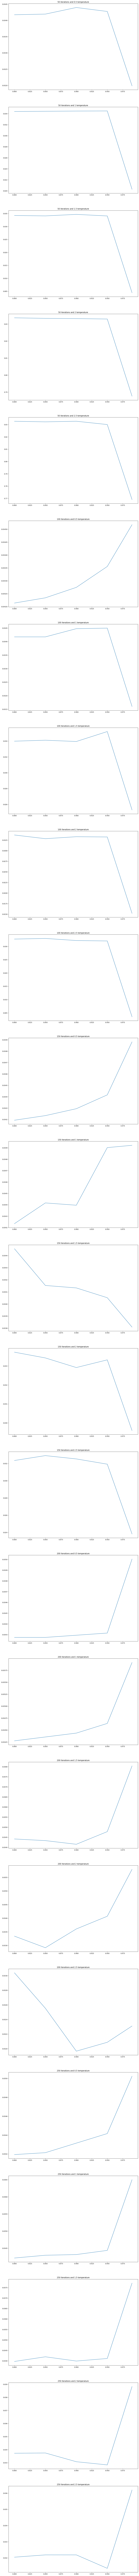

In [ ]:
fig, axs = plt.subplots(5**2, figsize=(15, 300))
counter = 0
for n in N_options:
    n_df = df_sa[df_sa['N'] == n]
    for temp in temp_options:
        temp_df = n_df[n_df['temp'] == temp]
        axs[counter].plot(temp_df['cooling_rate'], temp_df['accuracy'])
        axs[counter].set_title(str(n) + " iterations and " + str(temp) + " temperature")
        counter += 1

In order to analyze the relationships, we can fix all variables and modify them one at a time. In the graphs above, the different relationships between the initial temperature, the cooling rate and the number of iterations is shown. By keeping all variables other than the cooling factor fixed, we can see that the accuracy is maximised when the cooling factor is near 1. However, there doesn't seem to be a large difference. Now we modify the initial temperature.

In [ ]:
N_options = [50, 100, 150, 200, 250]
temp_counter = 0.5
temp_options = [temp_counter]
for i in range(25):
    temp_counter += 0.5
    temp_options.append(temp_counter)

results = {
    "N" : [None] * 625,
    "temp" : [None] * 625,
    "accuracy" : [None] * 625
}

pbar = tqdm(total=625, desc="Loading", position=0)
counter = 0

for n in N_options:
    for temp in temp_options:
        accuracy = []
        for i in range(5):
            solutions_sa = []
            for _, row in dataset.iterrows():
                target = row['Best price']
                solution, indexes = simulated_annealing(row, N = n, initial_temperature=temp, cooling_rate=0.99)
                solutions_sa.append(1 if target == solution else 0)
            accuracy.append(np.mean(solutions_sa))
            pbar.update(1)
        results["N"][counter] = n
        results["temp"][counter] = temp
        results["accuracy"][counter] = np.mean(accuracy)
        counter += 1
df_sa = pd.DataFrame(results)
df_sa

Loading: 100%|██████████| 625/625 [1:08:32<00:00,  6.58s/it]
Loading: 650it [1:11:48, 12.54s/it]

,N,temp,accuracy
0,50.0,0.5,0.831906
1,50.0,1.0,0.820002
2,50.0,1.5,0.806681
3,50.0,2.0,0.789230
4,50.0,2.5,0.767669
...,...,...,...
620,NaN,NaN,NaN
621,NaN,NaN,NaN
622,NaN,NaN,NaN
623,NaN,NaN,NaN


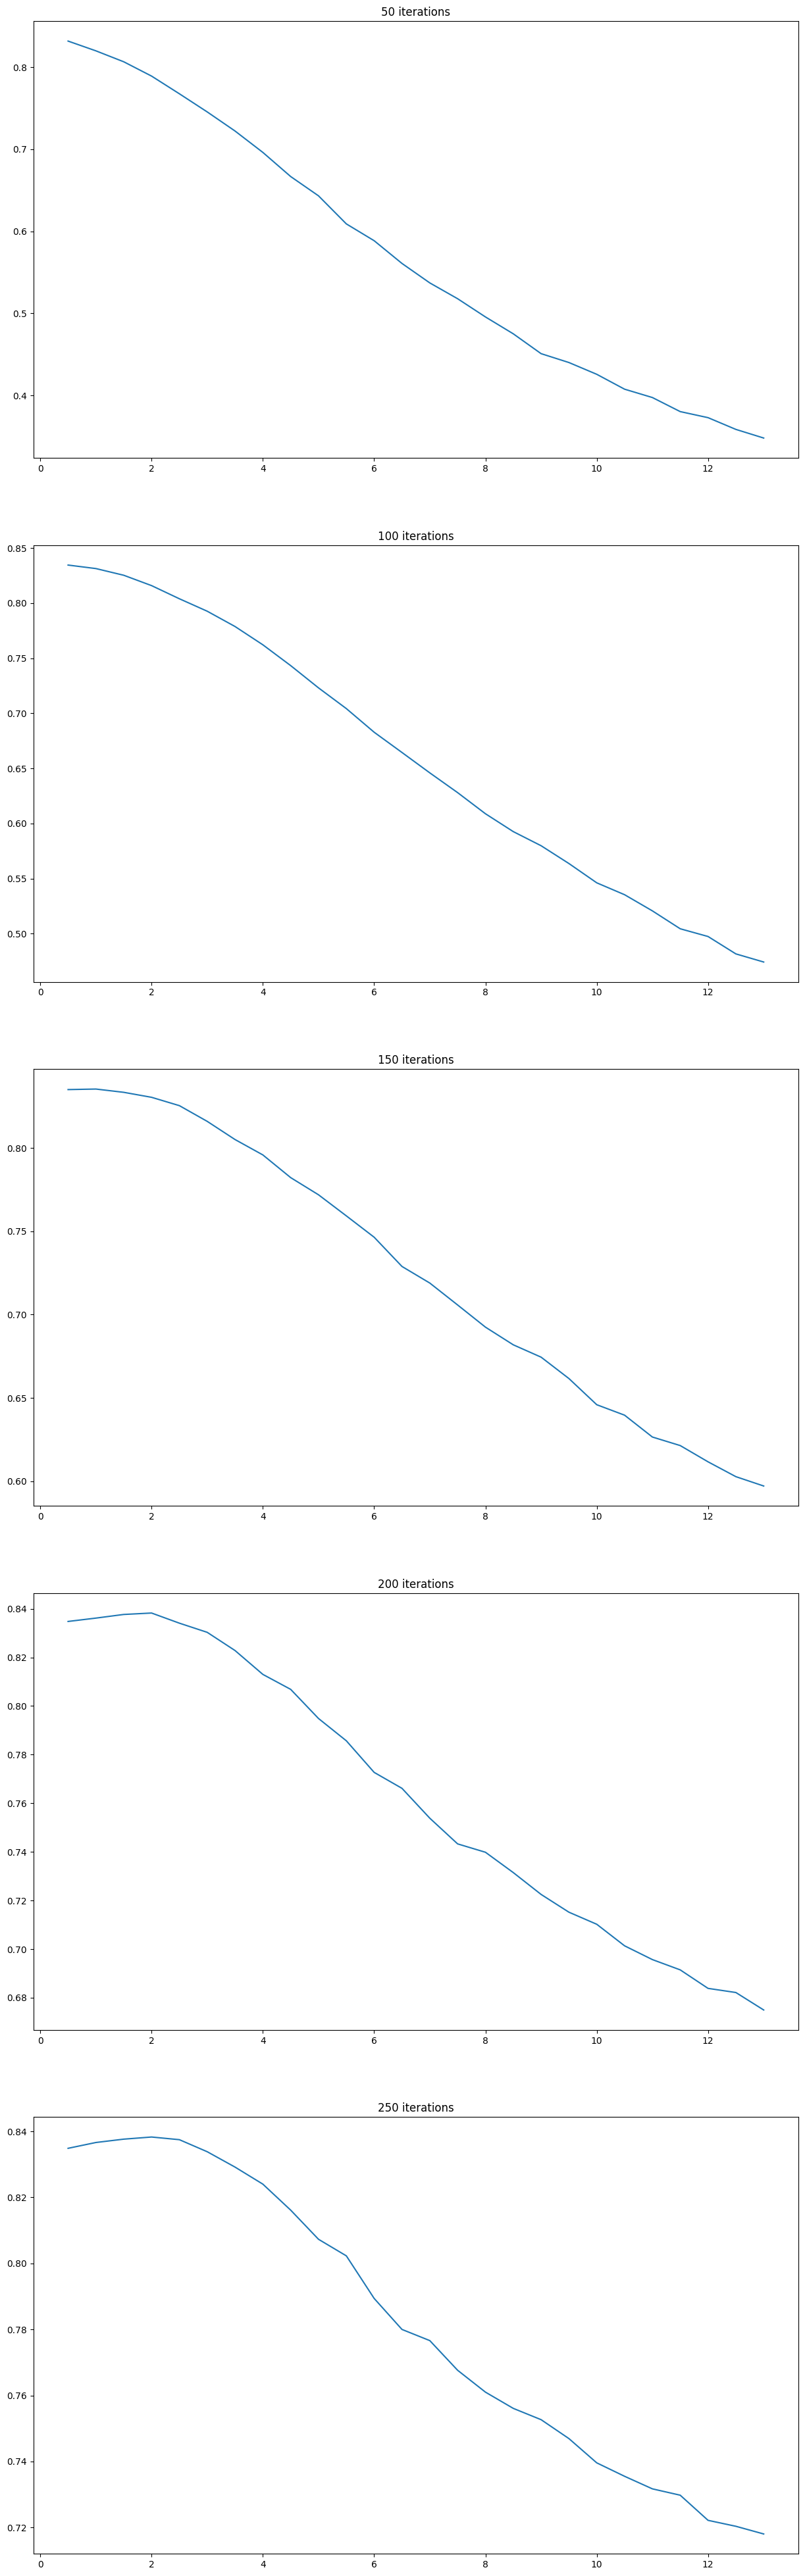

In [ ]:
fig, axs = plt.subplots(5, figsize=(15, 50))
counter = 0
for n in N_options:
    n_df = df_sa[df_sa['N'] == n]
    axs[counter].plot(n_df['temp'], n_df['accuracy'])
    axs[counter].set_title(str(n) + " iterations")
    counter += 1

In these graphs, we can clearly see that there is a relationship between the number of iterations and the initial temperature in order to maximize the accuracy. In the example with 50 iterations, the maximum of the accuracy is reached when the initial temperature is around 4, and for the example with 250 iterations, the maximum of the accuracy is reached around 9.5. However, it is also clear that accuracy is maximized when the number of iterations and the initial temperature are maximized.

------------------------------------------------------------------------------------------------

**7. Genetic Algorithm**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.

In [ ]:
import random

def sum_indices(array, indices):
    """
    Sums the list based on the indices in a set
    @param array: generic array (weights or prices in this case)
    @param indices: array of indices that are present in the set
    @return somme: sum of the elements in array present in indices
    """
    somme = 0
    for i in range(len(array)):
        somme = somme + array[i]*indices[i] #
    return somme

def calculate_fitness(ind, prices, weights, capacity):
    """
    Calculates the fitness of a combination
    @param ind: Indices of the elements present in the set
    @param prices: Prices of the elements in the set
    @param weights: Prices of the weights in the set
    @param capacity: Capacity of the knapsack problem
    @return: Fitness of the current combination
    """
    if sum_indices(weights, ind) > capacity:
        return 0 # fitness is 0 if combination of items is above capacity
    else:
        return sum_indices(prices, ind) # sum of the prices inside the bag

def crossover(parent1, parent2, cross_rate):
    """
    'Crosses' over indices between parent1 and parent2
    @param parent1: a possible solution for knapsack problem
    @param parent2: a possible solution for knapsack problem
    @param cross_rate: probability that each index is switched for each parent
    @return child1: parent1 with cross-over
    @return child2: parent2 with cross-over
    """
    child1 = parent1.copy()
    child2 = parent2.copy()
    for i in range(len(parent1)):
        if random.random() <= cross_rate: # random.random() generates a number between 0 and 1. essentially, the code in the if statement executes (cross_rate)% of the time
            child1[i], child2[i] = child2[i], child1[i] # swap the entries
    return child1, child2

def mutation(child, mut_rate):
    """
    Adds a possible mutation to each element of the solution
    @param child: Current combination
    @param mut_rate: Chance of a mutation
    @return child: Child with mutation
    """
    for i in range(len(child)):
        if random.random() <= mut_rate: # random.random() generates a number between 0 and 1. essentially, the code in the if statement executes (mut_rate)% of the time
            child[i] = float(not child[i]) # switch 0 to 1, or 1 to 0
    return child

def generate_population(size):
    """
    Genrates a population of the requested size
    @param size: size of population
    """
    population = []
    for _ in range(size):
        new_comb = []
        for _ in range(5):
            new_comb.append(random.randint(0,1)) # creates the element, ex. [0, 0, 1, 0, 1]
        population.append(new_comb) # appends the element
    return population

def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):
    """
    Runs the genetic algorithm.
    @param data: Information for the current knapsack problem
    @param population_size: size of initial population
    @param num_generations: number of generations to create before stopping
    @param mut_rate: how often we should mutate
    @param cross_rate: how oftem we should perform a cross_over between elements
    @param tournament_size: amount of elements in each tournament
    """
    population = generate_population(population_size) # creating the initial population
    for i in range(num_generations): # stopping condition: number of generations
        next_generation = [] # creating the next generation
        for k in range(int(population_size/2)): # for each iteration of this for loop, two elements are added to the next generation. therefore, this for loop is executed population_size/2 times
            selected_for_tournament1 = random.sample(population, tournament_size) # 5 random solutions selected
            fitness = []
            for j in range(tournament_size):
                fitness.append(calculate_fitness(selected_for_tournament1[j], data.Prices, data.Weights, data.Capacity)) # finding the fitness of all the elements in the tournament
            max_fitness_index = fitness.index(max(fitness))
            winner1 = selected_for_tournament1[max_fitness_index] # selecting the fittest in the tournament to move on to the next generation

            # we perform another tournament to get another winner to move on to the next generation. these two winners are used as the "parents" that will potentially cross_over to become the 2 children. then the 2 children may also mutate before being added to the next generation
            selected_for_tournament2 = random.sample(population, tournament_size) # 5 random solutions selected
            fitness = []
            for j in range(tournament_size):
                fitness.append(calculate_fitness(selected_for_tournament2[j], data.Prices, data.Weights, data.Capacity))
            max_fitness_index = fitness.index(max(fitness))
            winner2 = selected_for_tournament2[max_fitness_index]

            winner1, winner2 = crossover(winner1, winner2, cross_rate) # potential crossover between the two parents

            winner1 = mutation(winner1, mut_rate) # potential mutation
            winner2 = mutation(winner2, mut_rate) # potential mutation

            next_generation.append(winner1) # add to next generation
            next_generation.append(winner2) # add to next generation
        population = next_generation # previous for loop exited, meaning the next generation reached the original population size. so we can now assign it as population, and move on to the next generation

    # when we have gone through the amount of desired generations, we find the fittest in the population, which is the best solution
    fitness = []
    for i in range(len(population)):
        fitness.append(calculate_fitness(population[i], data.Prices, data.Weights, data.Capacity))
    max_fitness_index = fitness.index(max(fitness))
    best_solution = population[max_fitness_index]
    best_solution_price = sum_indices(data.Prices, best_solution)

    return best_solution_price, best_solution

In [ ]:
solutions_ga = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 10, num_generations = 10, mut_rate = 0.9, cross_rate = 0.9, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)


In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.3035732361575058


**Your Analysis:**

These are the results we found from varying mutation rate and crossover rate:

1. **High mutation and high crossover rate:**
genetic_algorithm(row, population_size = 10, num_generations = 10, mut_rate = 0.9, cross_rate = 0.9, tournament_size = 5) \\
Accuracy: 0.29739852211762324.

2. **High mutation and low crossover rate:**
genetic_algorithm(row, population_size = 10, num_generations = 10, mut_rate = 0.9, cross_rate = 0.1, tournament_size = 5) \\
Accuracy: 0.30084016600870533

3. **Low mutation and high crossover rate:**
genetic_algorithm(row, population_size = 10, num_generations = 10, mut_rate = 0.1, cross_rate = 0.9, tournament_size = 5) \\
Accuracy: 0.790565846745622

4. **Low mutation and low crossover rate:**
genetic_algorithm(row, population_size = 10, num_generations = 10, mut_rate = 0.1, cross_rate = 0.1, tournament_size = 5) \\
Accuracy: 0.7917805445895334

The accuracy goes down significantly for high mutation rates. This is expected, it doesn't seem very useful to randomly exchange points very frequently. Changing the cross_rate doesn't have a big impact.

This algorithm is nondeterministic, so rerunning the same function call gives slightly different accuracies.

------------------------------------------------------------------------------------------------

**8. Comparative Study**

description  +  tables/figures

--------------------------------------------------------------------------


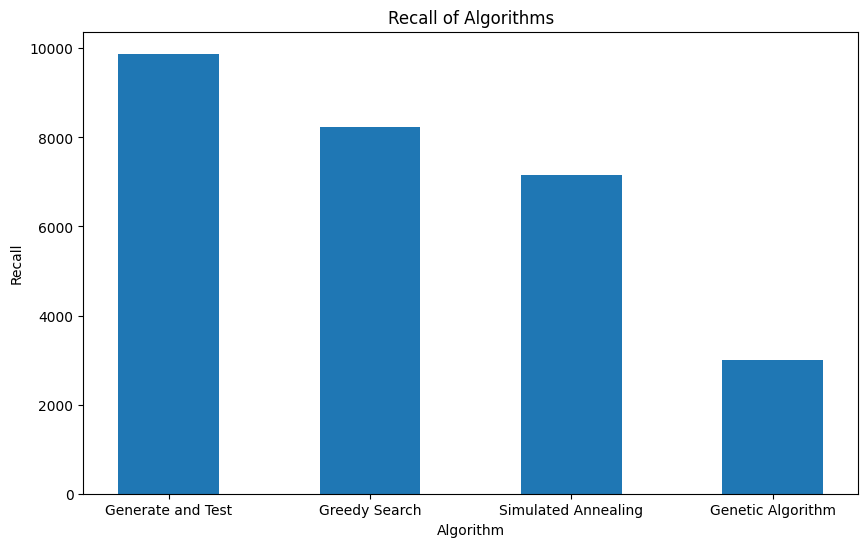

In [ ]:
import matplotlib.pyplot as plt

# calculating the recall for each algorithm (total number of correct solutions)
gen_and_test_recall = np.mean(solutions)*len(dataset) #len(dataset) = 9879
greedy_recall = np.mean(solutions_greedy)*len(dataset) # 8241
sa_recall = np.mean(solutions_sa)*len(dataset) # ~5807
ga_recall = np.mean(solutions_ga)*len(dataset) # ~7822

data = {'Generate and Test':gen_and_test_recall,
        'Greedy Search':greedy_recall,
        'Simulated Annealing':sa_recall,
        'Genetic Algorithm':ga_recall}

algorithm = list(data.keys())
recall = list(data.values())

fig = plt.figure(figsize = (10, 6)) #adjusting figure size

plt.bar(algorithm, recall, width = 0.5)

plt.xlabel("Algorithm")
plt.ylabel("Recall")
plt.title("Recall of Algorithms")
plt.show()

Generate and test has a perfect recall of 9879. Greedy search recall is 8241, which is decently accurate. Genetic algorithm is about 7822 (depending on the function call), which is pretty similar to greedy search. Simulated annealing recall is about 5807 (depending on the function call), which is less accurate.

**put here varying parameters for annealing**


For the genetic algorithm, we varied parameters to see the effect on the accuracy:

1. **genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)** \\
Accuracy: 0.9976718291325033 (The default function call given by the professor. This took nearly 40 minutes to run, so for the rest of the tests we lowered the population_size and num_generations)

2. **genetic_algorithm(row, population_size = 20, num_generations = 20, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)** \\
Accuracy: 0.9687215305192833

3. **genetic_algorithm(row, population_size = 10, num_generations = 10, mut_rate = 0.1, cross_rate = 0.7, tournament_size = 5)** \\
Accuracy: 0.8007895535985423

We noticed that the accuracy went down as we shrunk the population_size and num_generations. This makes sense, because you are more likely to get a better solution from a larger pool of solutions. Also, with more generations, you are improving the solutions more.

**9. Conclusion**

Comment on the empirical study, its results, and give ideas for future work.

- all results make sense, except we would have expected simulating annealing to have a similar accuracy as genetic algorithm
- future work: trying more different combinations of parameters

--------------------------------------------------------------------------


**10 References**

Make sure you provide references to ALL sources used (articles, code, algorithms).

1. https://www.w3schools.com/python/ref_random_random.asp
2. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".